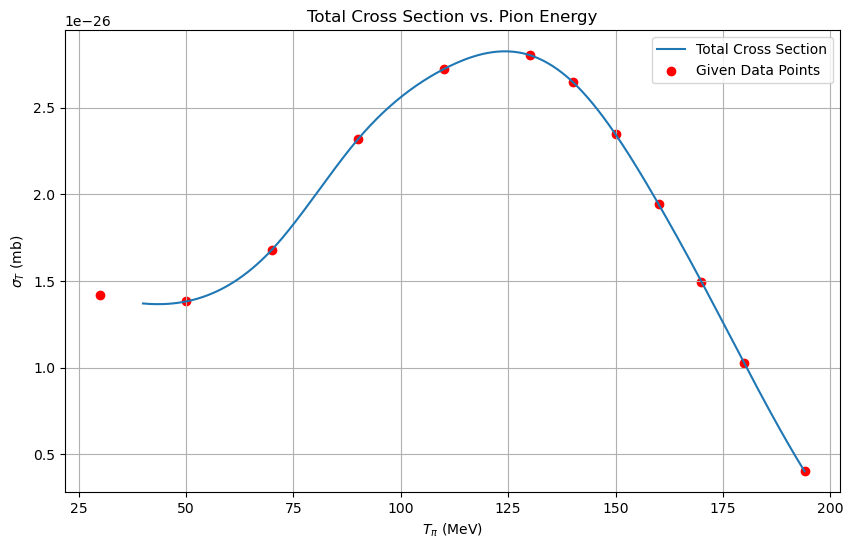

In [9]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Constants
m_pi = 139.6  # MeV/c^2
conversion_factor_to_mb = 10**31 / (const.hbar * const.c * 1e3)**2  # Convert to mb using hbar in MeV*s and c in m/s, then to m^2

# Given data
T_pi = np.array([30, 50, 70, 90, 110, 130, 140, 150, 160, 170, 180, 194])  # MeV
delta_0_deg = np.array([25]*len(T_pi))  # degrees, constant for all given T_pi
delta_1_deg = np.array([10, 18, 28, 43, 59, 78, 90, 100, 111, 122, 134, 154])  # degrees

# Convert degrees to radians
delta_0 = np.deg2rad(delta_0_deg)
delta_1 = np.deg2rad(delta_1_deg)

# Calculate momentum P_pi using the relativistic energy-momentum relation. The mass of the particle is going to stay constant for all of the 12 given T_pi values, so make an array of the same length as T_pi with the mass of the pion
P_pi = np.sqrt((T_pi + m_pi)**2 - m_pi**2)

hbar_c_MeV_fm = 197.3269788  # hbar*c in MeV*fm
conversion_factor_to_mb = 10**-27  # 1 fm^2 = 10^-30 m^2, and 1 mb = 10^-31 m^2, so 1 fm^2 = 10 mb

# Adjusting the sigma_T calculation to use the correct conversion factor
def sigma_T_corrected(P_pi, delta_0, delta_1):
    return (4 * np.pi / (P_pi / hbar_c_MeV_fm)**2) * ((2*0+1) * np.sin(delta_0)**2 + (2*1+1) * np.sin(delta_1)**2) * conversion_factor_to_mb

# Recompute sigma_T with the corrected conversion
sigma_T_values = sigma_T_corrected(P_pi, delta_0, delta_1)


# Adjusting T_pi_plot to be within the given data range
T_pi_plot = np.linspace(40, 194, 400)
sigma_T_interp = interp1d(T_pi, sigma_T_values, kind='cubic', fill_value="extrapolate")

# Re-plotting with the adjusted range
plt.figure(figsize=(10, 6))
plt.plot(T_pi_plot, sigma_T_interp(T_pi_plot), label='Total Cross Section')
plt.scatter(T_pi, sigma_T_values, color='red', label='Given Data Points')  # Highlight the given data points

plt.title('Total Cross Section vs. Pion Energy')
plt.xlabel('$T_{\pi}$ (MeV)')
plt.ylabel('$\sigma_T$ (mb)')
plt.legend()
plt.grid(True)
plt.savefig('total_cross_section.png')



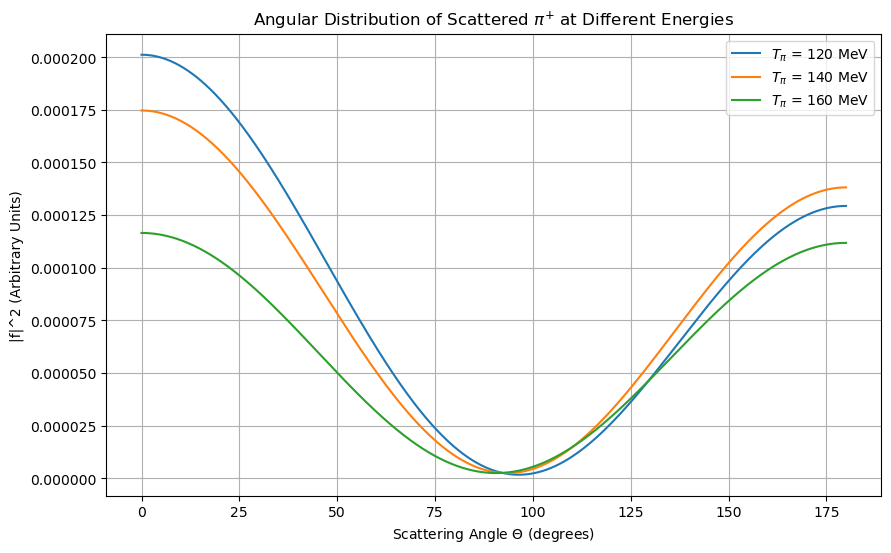

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scattering amplitude function
def scattering_amplitude(p, delta_0, delta_1, theta):
    """
    Calculates the scattering amplitude for given momentum p, phase shifts delta_0 and delta_1, and angle theta.
    """
    term_0 = np.exp(2j * delta_0) - 1
    term_1 = (np.exp(2j * delta_1) - 1) * np.cos(theta)
    return (1 / (2j * p)) * (term_0 + 3 * term_1)

# Calculate the angular distribution |f|^2
def angular_distribution(p, delta_0, delta_1, theta):
    f = scattering_amplitude(p, delta_0, delta_1, theta)
    return np.abs(f)**2

# Energies of interest
energies = [120, 140, 160]  # MeV

# Phase shifts at these energies, interpolated from given values
phase_shifts = {
    120: {'delta_0': np.deg2rad(25), 'delta_1': np.deg2rad(68)},  # Updated based on the plot provided earlier
    140: {'delta_0': np.deg2rad(25), 'delta_1': np.deg2rad(90)},
    160: {'delta_0': np.deg2rad(25), 'delta_1': np.deg2rad(111)}
}

# Pion mass
m_pi = 139.6  # MeV/c^2

# Calculate momentum P_pi for each energy
p_pions = {T: np.sqrt(T**2 + 2*m_pi*T) for T in energies}

# Angular range
theta = np.linspace(0, np.pi, 500)  # From 0 to π radians

# Plot the angular distribution
plt.figure(figsize=(10, 6))

for T in energies:
    p = p_pions[T]
    delta_0 = phase_shifts[T]['delta_0']
    delta_1 = phase_shifts[T]['delta_1']
    distribution = angular_distribution(p, delta_0, delta_1, theta)
    # convert the angular distribution by dividing by 
    plt.plot(np.degrees(theta), distribution, label=f'$T_{{\pi}}$ = {T} MeV')

plt.title('Angular Distribution of Scattered $\pi^{+}$ at Different Energies')
plt.xlabel('Scattering Angle $\Theta$ (degrees)')
plt.ylabel('|f|^2 (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.savefig('angular_distribution.png')
